In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#libraries 
#%matplotlib notebook
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
import itertools
import seaborn
import matplotlib.dates as md
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D

LECTURA DE DATOS


In [ ]:
URL = 'https://drive.google.com/file/d/1ImirryRX-CqFYhQxtNO7s3NLMirfgdlx/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]

df = pd.read_csv(path,delimiter=';',parse_dates=['DateObserved'])
#filename = ''
#df = pd.read_csv(filename, delimiter = ',', parse_dates=['DateObserved'])
df.head(10)

,Id,Machine,DateStr,DateObserved,H,V,C
0,921880,Batidora,01/09/2018 13:39:16,2018-09-01 13:39:16,0.18,0.14,0.1
1,921881,Batidora,01/09/2018 13:39:46,2018-09-01 13:39:46,0.17,0.15,0.1
2,921882,Batidora,01/09/2018 13:40:15,2018-09-01 13:40:15,0.17,0.17,0.1
3,921883,Batidora,01/09/2018 13:42:56,2018-09-01 13:42:56,0.17,0.16,0.1
4,921884,Batidora,01/09/2018 13:43:26,2018-09-01 13:43:26,0.17,0.19,0.1
5,921885,Batidora,01/09/2018 13:43:56,2018-09-01 13:43:56,0.20,0.18,0.1
6,921886,Batidora,01/09/2018 13:44:26,2018-09-01 13:44:26,0.18,0.17,0.1
7,921887,Batidora,01/09/2018 13:44:55,2018-09-01 13:44:55,0.18,0.17,0.1
8,921888,Batidora,01/09/2018 13:45:25,2018-09-01 13:45:25,0.22,0.16,0.1
9,921889,Batidora,01/09/2018 13:45:55,2018-09-01 13:45:55,0.18,0.16,0.1


Selecciono los datos de la batidora y elimino las columnas inncecesarias

In [ ]:
batidora = df.loc[df['Machine'] == 'Batidora']
cols = ['Id', 'DateStr', 'Machine']
batidora.drop(cols, axis=1, inplace=True)
#batidora = batidora.sort_values('DateObserved')

Compruebo los datos que son nulos

In [ ]:
batidora.isnull().sum()

DateObserved     0
H               28
V                0
C                7
dtype: int64

In [ ]:
import plotly.express as px
df = batidora 
df.head()

,DateObserved,H,V,C
0,2018-09-01 13:39:16,0.18,0.14,0.1
1,2018-09-01 13:39:46,0.17,0.15,0.1
2,2018-09-01 13:40:15,0.17,0.17,0.1
3,2018-09-01 13:42:56,0.17,0.16,0.1
4,2018-09-01 13:43:26,0.17,0.19,0.1


In [ ]:
fig = px.line(df[:500], x="DateObserved", y=df.columns,
              hover_data={"DateObserved": "|%c"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

Agrupo el dataset en grupos de 15 minutos donde aplico la media Después de agrupar pongo los nulos a la media

In [ ]:
batidora= batidora.set_index('DateObserved')
batidora_resample15m = batidora.resample('15min').mean()
batidora_resample15m['H'].fillna(batidora_resample15m['H'].min(),inplace=True)
batidora_resample15m['C'].fillna(batidora_resample15m['C'].min(),inplace=True)
batidora_resample15m['V'].fillna(batidora_resample15m['V'].min(),inplace=True)
batidora_resample15m.head()

,H,V,C
DateObserved,,,
2018-09-01 13:30:00,0.177500,0.166250,0.100000
2018-09-01 13:45:00,0.181667,0.169000,0.100000
2018-09-01 14:00:00,0.183871,0.166452,0.100323
2018-09-01 14:15:00,0.190323,0.170968,0.102581
2018-09-01 14:30:00,0.195806,0.183871,0.100000


Creo otro dataset agrupado por 5 minutos para poder comparar

In [ ]:
batidora_resample5m = batidora.resample('5min').mean()
batidora_resample5m['H'].fillna(batidora_resample5m['H'].min(),inplace=True)
batidora_resample5m['C'].fillna(batidora_resample5m['C'].min(),inplace=True)
batidora_resample5m['V'].fillna(batidora_resample5m['V'].min(),inplace=True)

batidora_resample5m.head()

,H,V,C
DateObserved,,,
2018-09-01 13:35:00,0.175000,0.145000,0.1
2018-09-01 13:40:00,0.178333,0.173333,0.1
2018-09-01 13:45:00,0.185000,0.162000,0.1
2018-09-01 13:50:00,0.178000,0.174000,0.1
2018-09-01 13:55:00,0.182000,0.171000,0.1


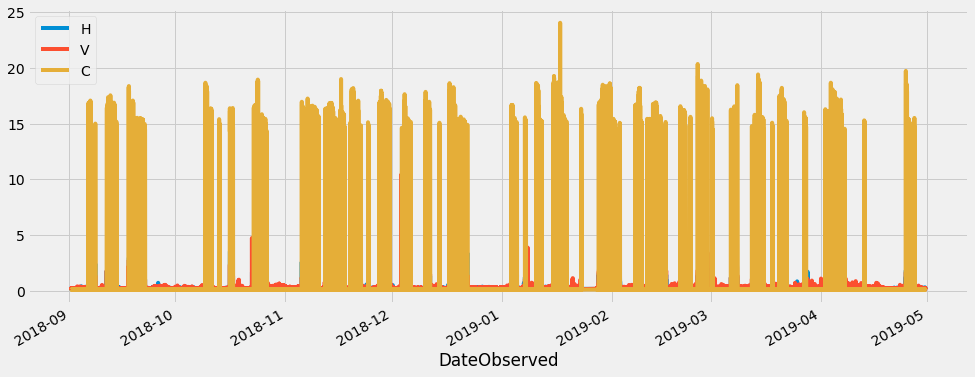

In [ ]:
batidora.plot(figsize=(15, 6))
plt.show()

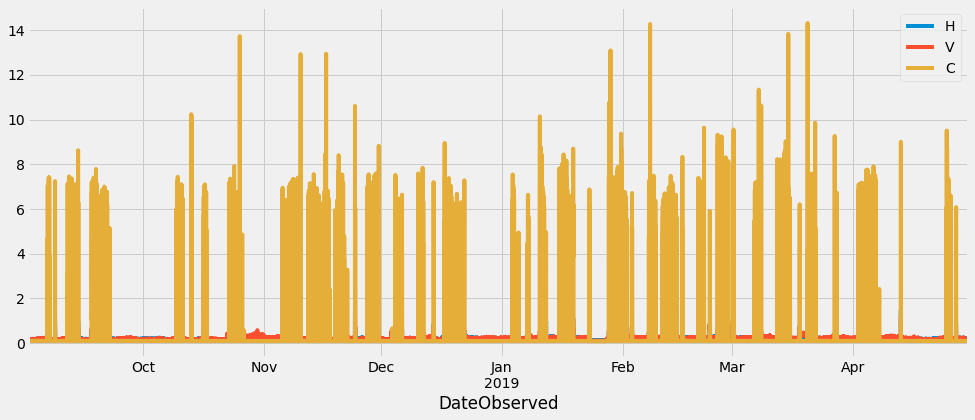

In [ ]:
batidora_resample15m.plot(figsize=(15, 6))
plt.show()

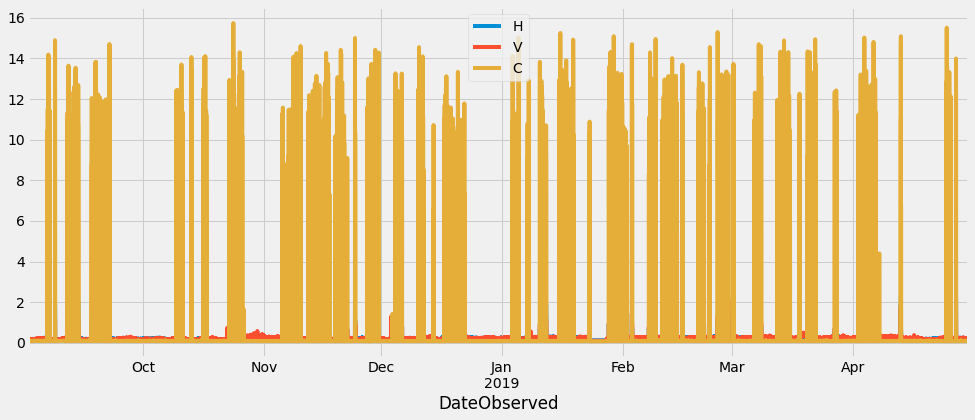

In [ ]:
batidora_resample5m.plot(figsize=(15, 6))
plt.show()

# Clustering-Based Anomaly Detection

**k-means algorithm**

K-means es un algoritmo de clustering ampliamente utilizado. Crea 'K' grupos similares de puntos de datos. Las instancias de datos que caen fuera de estos grupos podian marcarse omo anomalias. Antes de comenzar con la agrupacion de K-means, usamos el métodos de la **curva de Elbow** determinar el número óptimo de agrupaciones.

https://aprendemachinelearning.com/k-means-en-python-paso-a-paso




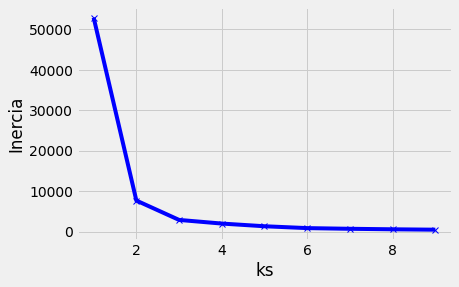

In [ ]:
#Vemos la inertia con Kmeans para distintos números de clusters:
data = batidora_resample15m[['H','V','C']]
from sklearn.cluster import KMeans
inercias = []
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  inercias.append(kmeans.inertia_)

plt.plot(range(1,10), inercias, 'bx-')
plt.xlabel('ks')
plt.ylabel('Inercia')
plt.show()

De la curva del Elbow, vemos que la gráfica se nivela después de 4 grupos, lo que implicaa que la adicción de más grupos no explica mucho más la varianza en nuestra variable relevante.

El siguiente paso es predecir y representar los clusters con sus centroides

In [ ]:
X = batidora_resample15m[['H','V','C']]
#X = X.reset_index(drop=True)
km = KMeans(n_clusters=4)
km.fit(X)
y_kmeans = km.predict(X)
labels = km.labels_

**Representacion 2D**

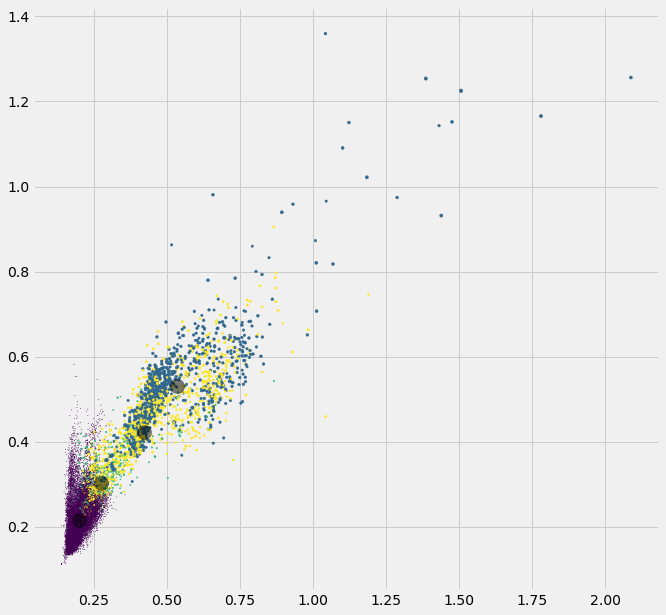

In [ ]:
#ploting 2D
fig = plt.figure(1, figsize = (10, 10))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
#fig, ax = plt.subplots()
#ax.scatter(X.iloc[:,0], X.iloc[:, 1], X.iloc[:,2],c=labels.astype(np.float), edgecolor="K")

plt.scatter(X.iloc[:,0], X.iloc[:, 1], X.iloc[:,2], c=y_kmeans)

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Representación 3D**

No handles with labels found to put in legend.


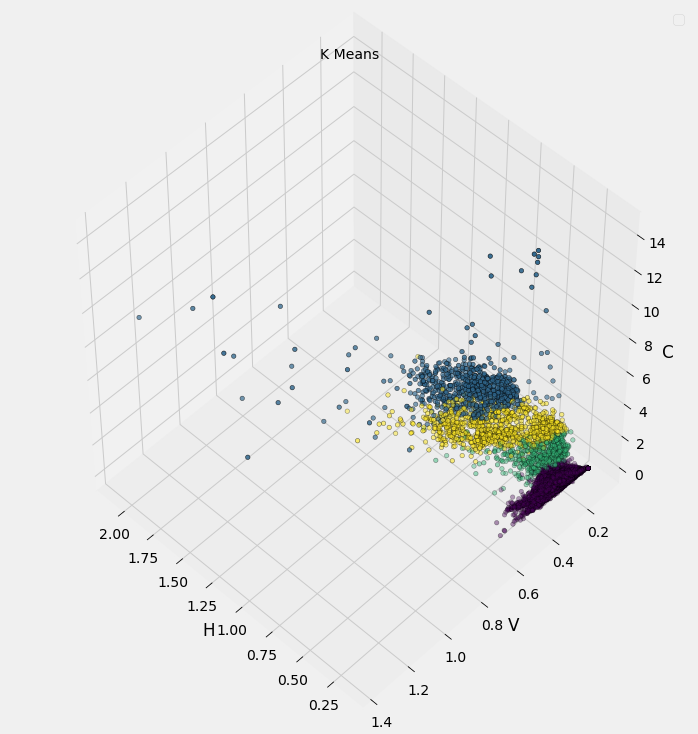

In [ ]:
#ploting
fig = plt.figure(1, figsize = (10, 10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax. scatter(X.iloc[:,0], X.iloc[:, 1], X.iloc[:,2],
            c=labels.astype(np.float), edgecolor='k')
ax.set_xlabel('H')
ax.set_ylabel('V')
ax.set_zlabel('C')
plt.legend()
plt.title("K Means", fontsize=14);

Clasifico los datos en los diferentes clusters

unimos los datos de X y le ponemos a que cluster pertenece y como se han distribuido los cluster

In [ ]:
data = X[['H', 'V', 'C']]
resultado = X
kmeans = KMeans(n_clusters=4).fit(data)
center = kmeans.cluster_centers_
resultado['cluster'] = kmeans.predict(data)
resultado['DateObserved'] = X.index
resultado.index = data.index
resultado['cluster'].value_counts()
#podemos ver cuantos datos tenemos en cada cluster:
#hay 3 clusters, en el cluster 0 hay 20560 clusters y asi con los sigueintes


0    20560
1     1181
2      819
3      573
Name: cluster, dtype: int64

En esta sección de código creo una función que mide la distancia de los puntos en base a su centroide. La distancia se calcula

In [ ]:
resultado.head() #resultado es la matriz de acontinucion

,H,V,C,cluster,DateObserved
DateObserved,,,,,
2018-09-01 13:30:00,0.177500,0.166250,0.100000,0,2018-09-01 13:30:00
2018-09-01 13:45:00,0.181667,0.169000,0.100000,0,2018-09-01 13:45:00
2018-09-01 14:00:00,0.183871,0.166452,0.100323,0,2018-09-01 14:00:00
2018-09-01 14:15:00,0.190323,0.170968,0.102581,0,2018-09-01 14:15:00
2018-09-01 14:30:00,0.195806,0.183871,0.100000,0,2018-09-01 14:30:00


In [ ]:
#sacamos las distancias del primer centroide
kmeans.transform(data)

array([[0.05543028, 3.8596383 , 6.69382576, 1.92264667],
       [0.05133944, 3.85919527, 6.69345519, 1.92225115],
       [0.05304221, 3.85890534, 6.69315532, 1.92200447],
       ...,
       [0.02467815, 3.85226901, 6.68722925, 1.91624811],
       [0.03789138, 3.84899697, 6.684054  , 1.91339824],
       [0.04672207, 3.85199347, 6.68716724, 1.91673845]])

In [ ]:
#en base a la distancia y al outlayer veremos si es una anomalia, 
#si la distancia es mayor que 0,01 es una anomalia
outliers_fraction = 0.01
#obtengo el mìnimo del número de resgitros obtenido al calcular el numero de outliers
#las distancias se ordenan de mayor a menor y se cogen los x numero de outliers
distances = (kmeans.transform(data))
#anomaly1 contain the anomaly result of the above method cluster(0:anomalia, 1:normal)
resultado['distance'] = kmeans.transform(data)[:,0]
resultado['anomaly1'] = (resultado['distance'] >= outliers_fraction).astype(int)
resultado.head(10)

,H,V,C,cluster,DateObserved,distance,anomaly1
DateObserved,,,,,,,
2018-09-01 13:30:00,0.177500,0.166250,0.100000,0,2018-09-01 13:30:00,0.055430,1
2018-09-01 13:45:00,0.181667,0.169000,0.100000,0,2018-09-01 13:45:00,0.051339,1
2018-09-01 14:00:00,0.183871,0.166452,0.100323,0,2018-09-01 14:00:00,0.053042,1
2018-09-01 14:15:00,0.190323,0.170968,0.102581,0,2018-09-01 14:15:00,0.047061,1
2018-09-01 14:30:00,0.195806,0.183871,0.100000,0,2018-09-01 14:30:00,0.033551,1
2018-09-01 14:45:00,0.199667,0.175000,0.100000,0,2018-09-01 14:45:00,0.042225,1
2018-09-01 15:00:00,0.190645,0.177742,0.100000,0,2018-09-01 15:00:00,0.040423,1
2018-09-01 15:15:00,0.183548,0.173548,0.100000,0,2018-09-01 15:15:00,0.046427,1
2018-09-01 15:30:00,0.185161,0.174839,0.100000,0,2018-09-01 15:30:00,0.044681,1


In [ ]:
#vamos a ver su distribucion
resultado['anomaly1'].value_counts()

1    22591
0      542
Name: anomaly1, dtype: int64

tenemos 542 anomalias.

22591 + 542 = 23133

Por lo que tenemos 2,3% de anomaliass en los datos 

In [ ]:
#vamos a calcular la propabilidad y el nivel de 
scaler = MinMaxScaler(feature_range=(0, 1))
resultado['probabilty'] = scaler.fit_transform(resultado[['distance']])*100
resultado['level'] = 'low'
resultado['level'] = np.where(resultado['probabilty']>=50, 'medium', 'low')
resultado['level'] = np.where(resultado['probabilty']>=60, 'high', resultado['level'])
resultado['level'] = np.where(resultado['probabilty']>=75, 'critical', resultado['level'])
resultado['level'].value_counts()


low         22942
medium        149
high           30
critical       12
Name: level, dtype: int64

Segun esto hay 12 anomalias criticas y 30 altas(lo unico que nos importa es high y critical), por lo que la distancia tiene una probabilidad de un 75%

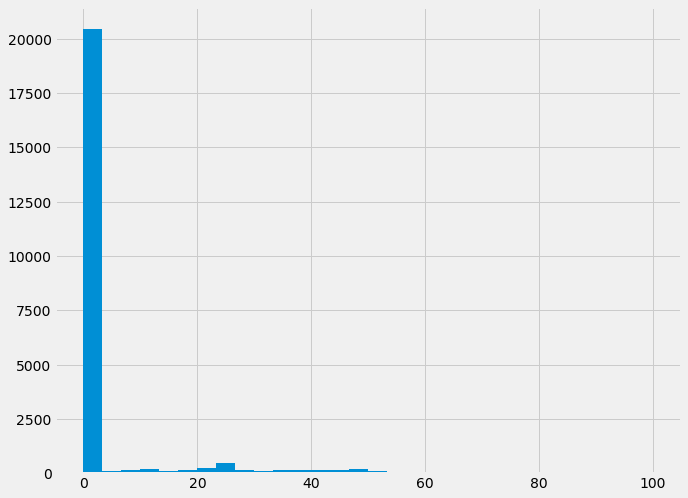

In [ ]:
resultado['probabilty'].hist(bins=30, grid=True, figsize=(10,8))

In [ ]:
resultado['probabilty'].describe(percentiles=(.1,.25,.5,.75,.9,.95,0.99))

count    23133.000000
mean         3.721269
std         10.525017
min          0.000000
10%          0.120938
25%          0.202125
50%          0.331933
75%          0.530539
90%         12.805408
95%         29.132259
99%         49.250953
max        100.000000
Name: probabilty, dtype: float64

vemos que hay un 99% que llega a 50 

## Pintar anomalias


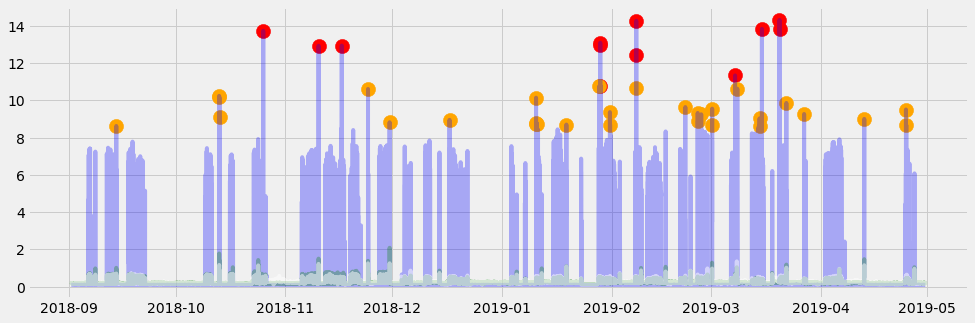

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
#primeros cogemos lo que marcamos como anomalias, las marcamos con puntos rojos, y lo que son altas se marca como naranja
criticas = resultado.loc[(resultado['anomaly1'] ==1) & (resultado['level'] == 'critical')]
altas = resultado.loc[(resultado['anomaly1'] ==1) & (resultado['level'] == 'high')]
ax.scatter(criticas['DateObserved'], criticas['C'], color='red', s=200)
ax.scatter(altas['DateObserved'], altas['C'], color='orange', s=200)
#se pintan las diferentes series
ax.plot(resultado['DateObserved'], resultado['C'], color='blue',alpha=0.3)
ax.plot(resultado['DateObserved'], resultado['H'], color='green',alpha=0.3)
ax.plot(resultado['DateObserved'], resultado['V'], color='white',alpha=0.5)
plt.show()

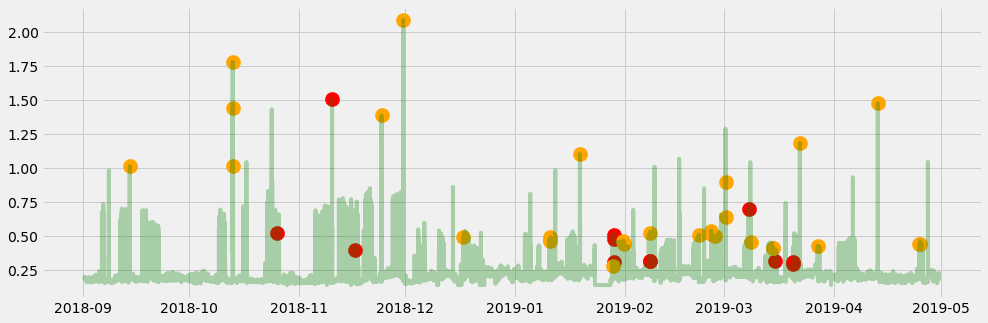

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
#primeros cogemos lo que marcamos como anomalias, las marcamos con puntos rojos, y lo que son altas se marca como naranja
criticas = resultado.loc[(resultado['anomaly1'] ==1) & (resultado['level'] == 'critical')]
altas = resultado.loc[(resultado['anomaly1'] ==1) & (resultado['level'] == 'high')]
ax.scatter(criticas['DateObserved'], criticas['H'], color='red', s=200)
ax.scatter(altas['DateObserved'], altas['H'], color='orange', s=200)
ax.plot(resultado['DateObserved'], resultado['H'], color='green',alpha=0.3)
plt.show()
#solo pintamos la vibracion Horizontal 

analizaer los rojos


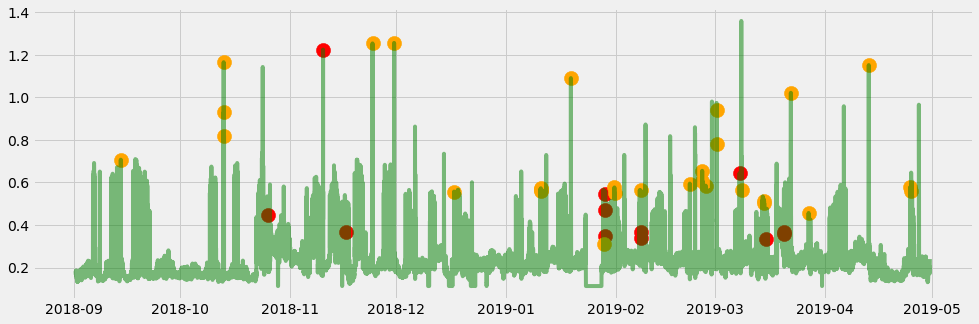

In [ ]:
#ANALIZAMOS LA VIBRACION VERTICAL
fig, ax = plt.subplots(figsize=(15, 5))
#primeros cogemos lo que marcamos como anomalias, las marcamos con puntos rojos, y lo que son altas se marca como naranja
criticas = resultado.loc[(resultado['anomaly1'] ==1) & (resultado['level'] == 'critical')]
altas = resultado.loc[(resultado['anomaly1'] ==1) & (resultado['level'] == 'high')]
ax.scatter(criticas['DateObserved'], criticas['V'], color='red', s=200)
ax.scatter(altas['DateObserved'], altas['V'], color='orange', s=200)
#se pintan las diferentes series
ax.plot(resultado['DateObserved'], resultado['V'], color='green',alpha=0.5)
plt.show()

In [ ]:
importantes = resultado.loc[(resultado['anomaly1'] ==1) & (resultado['probabilty']>=60)]
importantes.head(20)


,H,V,C,cluster,DateObserved,distance,anomaly1,propabilty,level,probabilty
DateObserved,,,,,,,,,,
2018-09-14 07:00:00,1.012258,0.707097,8.626774,2,2018-09-14 07:00:00,8.577205,1,60.328249,high,60.328249
2018-10-13 07:30:00,1.780000,1.165484,10.243226,2,2018-10-13 07:30:00,10.307149,1,72.497763,high,72.497763
2018-10-13 08:30:00,1.439000,0.931667,10.160000,2,2018-10-13 08:30:00,10.159021,1,71.455739,high,71.455739
2018-10-13 10:00:00,1.011290,0.820645,9.100000,2,2018-10-13 10:00:00,9.054448,1,63.685475,high,63.685475
2018-10-25 18:00:00,0.525000,0.446000,13.732333,2,2018-10-25 18:00:00,13.635895,1,95.914263,critical,95.914263
2018-11-10 08:30:00,1.506452,1.224839,12.930645,2,2018-11-10 08:30:00,12.934132,1,90.977624,critical,90.977624
2018-11-16 21:30:00,0.393437,0.369375,12.943437,2,2018-11-16 21:30:00,12.843557,1,90.340461,critical,90.340461
2018-11-24 07:15:00,1.385938,1.253750,10.612813,2,2018-11-24 07:15:00,10.628008,1,74.754887,high,74.754887
2018-11-30 09:30:00,2.087742,1.256129,8.825484,2,2018-11-30 09:30:00,8.985570,1,63.200945,high,63.200945


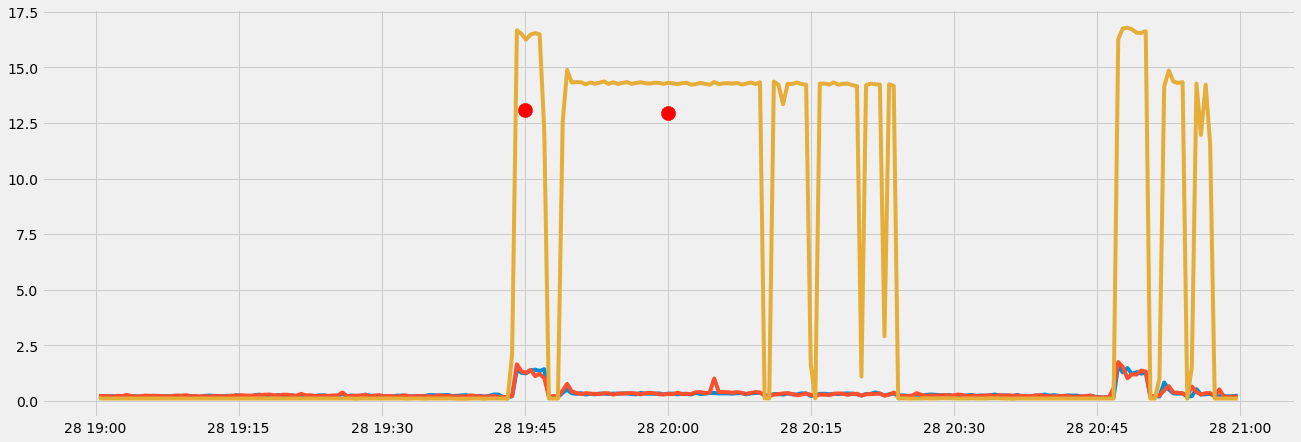

In [ ]:
#podemos ver en un dia concreto donde estan los problemas
dfsub = batidora.loc['2019-01-28 19':'2019-01-28 20']
anomalias = importantes.loc['2019-01-28 19':'2019-01-28 20']
fig, ax = plt.subplots(figsize=(20,7))
x = dfsub.index
ax.scatter(anomalias['DateObserved'],anomalias['C'], color='red', s=200)
ax.plot(x, dfsub['H'])
ax.plot(x, dfsub['V'])
ax.plot(x, dfsub['C'])
plt.show()